In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 한 실행칸에 프린트 여러개 해도 다 출력시키도록 하는 코드.
from datetime import datetime
from sklearn.linear_model import LinearRegression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
_start = datetime(2009,1,1)
stock_list = ['005930.KS', '005935.KS'] # 삼성전자 보통주 & 삼성전자 우선주
data = pdr.get_data_yahoo(stock_list, start = _start)
data = data.xs('Close', axis = 1)
data.head()

Symbols     005930.KS  005935.KS
Date                            
2009-01-02     9400.0     5400.0
2009-01-05     9520.0     5560.0
2009-01-06     9960.0     5800.0
2009-01-07    10480.0     6300.0
2009-01-08    10160.0     6020.0

Text(0.5, 1.0, '005930 & 005935')

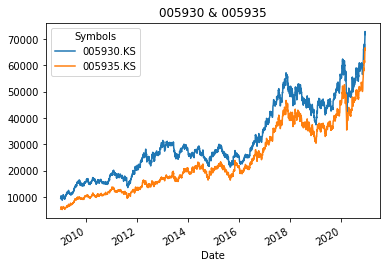

In [3]:
data.plot()
plt.title('005930 & 005935')
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'stationary process')

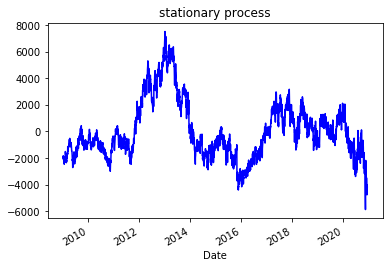

In [4]:
# Find a stationary relation
y = data['005930.KS']
x = data['005935.KS']
lr = LinearRegression()
lr.fit(x.to_numpy().reshape(-1,1), y)
coef = lr.coef_
intercept = lr.intercept_
stationaryProcess = y-coef*x-intercept
stationaryProcess.plot(color = 'blue')
plt.title('stationary process')
plt.show()
stationaryProcess = stationaryProcess.to_numpy()

In [6]:
# Error Correction Model
y = stationaryProcess[1:] - stationaryProcess[:-1]
x = stationaryProcess[:-1]
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)
coef = lr.coef_
intercept = lr.intercept_
residual = y - x * coef - intercept
RV2ofResidual = np.zeros(len(residual))

for i in range(20, len(residual)):
    RV2ofResidual[i] = np.sum(residual[i-20:i] * residual[i-20:i])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Mean-Variance Betting
BettingResults = (stationaryProcess[1:] - stationaryProcess[:-1]) * x * coef / RV2ofResidual
BettingResults = BettingResults[20:]
realizedSR = np.sqrt(252) * BettingResults.mean() / BettingResults.std()
print('Sharpe ratio :', realizedSR)

Sharpe ratio : 0.9413733623195385


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
